<a href="https://colab.research.google.com/github/pddiste/TimeSeries/blob/master/jenkspy_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install jenkspy

!wget https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys

import jenkspy

uk = pd.read_csv("UK.csv",sep=';', decimal=',')

print(uk.info(verbose=True))
print(uk.head())

uk['date'] = pd.to_datetime(uk['date'])
uk.set_index(uk['date'], inplace = True)

ts_sessions = uk['sessions']
ts_searches = uk['searches']
ts_bookings = uk['bookings']

ts_searchesONsessions = uk['searchesONsessions']
ts_bookingsONsessions = uk['bookingsONsessions']
ts_bookingsONsearches = uk['bookingsONsearches']



--2022-05-18 09:07:48--  https://raw.githubusercontent.com/pddiste/TimeSeries/master/UK.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2414 (2.4K) [text/plain]
Saving to: ‘UK.csv.6’

UK.csv.6            100%[===================>]   2.36K  --.-KB/s    in 0s      

2022-05-18 09:07:48 (34.3 MB/s) - ‘UK.csv.6’ saved [2414/2414]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                40 non-null     object 
 1   sessions            40 non-null     int64  
 2   searches            40 non-null     int64  
 3   bookings            40 non-null     int64  
 4   searchesONsessions  40 non-null   

change point:  DatetimeIndex(['2021-02-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2021-10-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2019-07-01'], dtype='datetime64[ns]', name='date', freq=None)


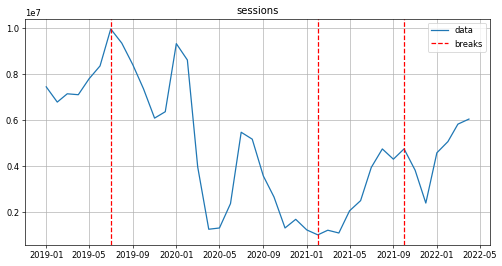

change point:  DatetimeIndex(['2020-04-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2022-03-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', name='date', freq=None)


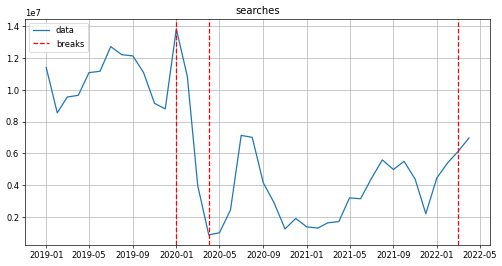

change point:  DatetimeIndex(['2020-04-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2020-08-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', name='date', freq=None)


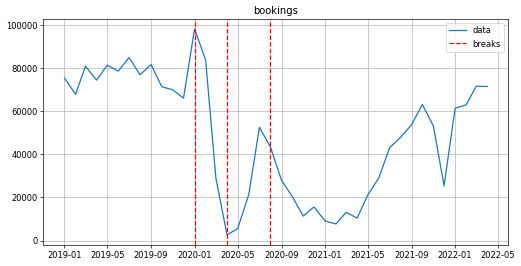

change point:  DatetimeIndex(['2020-04-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2021-08-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2021-05-01'], dtype='datetime64[ns]', name='date', freq=None)


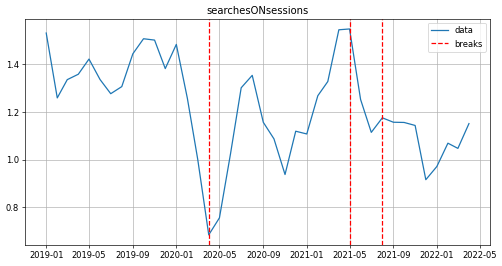

change point:  DatetimeIndex(['2020-04-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2020-06-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2021-11-01'], dtype='datetime64[ns]', name='date', freq=None)


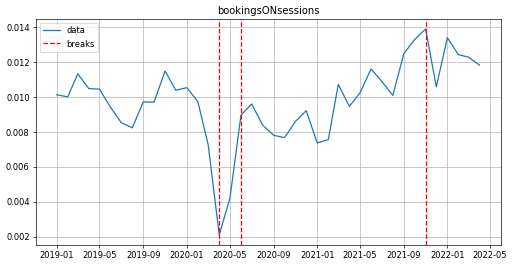

change point:  DatetimeIndex(['2020-04-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2020-06-01'], dtype='datetime64[ns]', name='date', freq=None)
change point:  DatetimeIndex(['2022-01-01'], dtype='datetime64[ns]', name='date', freq=None)


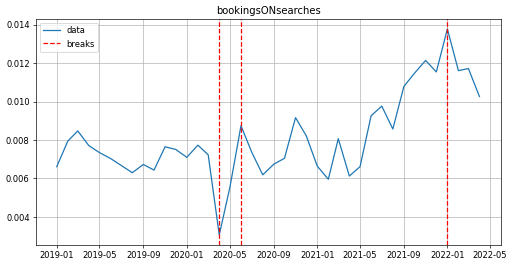

In [39]:
n_breaks = 3

dpi = 60


#-------------------

ts = ts_sessions.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('sessions')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()

#-------------
ts = ts_searches.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('searches')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()


#-------------
ts = ts_bookings.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('bookings')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()


#-------------
ts = ts_searchesONsessions.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('searchesONsessions')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()


#-------------
ts = ts_bookingsONsessions.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('bookingsONsessions')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()


#-------------
ts = ts_bookingsONsearches.copy()

y = np.array(ts.tolist())

breaks = jenkspy.jenks_breaks(y, nb_class=n_breaks-1)

breaks_jkp = []
for v in breaks:
    idx = ts.index[ts == v]
    breaks_jkp.append(idx)
#print(breaks_jkp)

plt.figure(figsize=(10, 5), dpi=dpi)
plt.plot(ts, label='data')
plt.title('bookingsONsearches')
print_legend = True
for i in breaks_jkp:
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
        print('change point: ', i)
    else:
        plt.axvline(i, color='red',linestyle='dashed')
        print('change point: ', i)
plt.grid()
plt.legend()
plt.show()
